# ケプラーの第二法則

* (1609) A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.

![fig-01](https://upload.wikimedia.org/wikipedia/commons/9/98/Kepler_laws_diagram.svg)

* [Kepler orbit - Wikipedia](https://en.wikipedia.org/wiki/Kepler_orbit)
    * [Celestial mechanics - Wikipedia](https://en.wikipedia.org/wiki/Celestial_mechanics)
        * [True anomaly - Wikipedia](https://en.wikipedia.org/wiki/True_anomaly)
        * [Mean anomaly - Wikipedia](https://en.wikipedia.org/wiki/Mean_anomaly)
        * [Eccentric anomaly - Wikipedia](https://en.wikipedia.org/wiki/Eccentric_anomaly)

* [Kepler's equation - Wikipedia](https://en.m.wikipedia.org/wiki/Kepler%27s_equation)
  - [Kepler's Equation -- from Wolfram MathWorld](https://mathworld.wolfram.com/KeplersEquation.html)

$$
  M = E - e \sin E
$$

"I am sufficiently satisfied that it (Kepler's equation) cannot be solved a priori, on account of the different nature of the arc and the sine. But if I am mistaken, and any one shall point out the way to me, he will be in my eyes the great Apollonius." by Johannes Kepler

「私は、円弧と正弦の性質の違いから、この方程式が原理的に解けないことに十分満足している。しかし、もし私が間違っていて、誰か私に道を指し示す者がいれば、その人は私の目には偉大なアポロニウスと映るだろう。」

* [Transcendental equation - Wikipedia](https://en.wikipedia.org/wiki/Transcendental_equation) (超越方程式)

* [Kepler's equation - Wikipedia](https://en.wikipedia.org/wiki/Kepler%27s_equation)
    * [Bessel function - Wikipedia](https://en.wikipedia.org/wiki/Bessel_function)
        - [scipy.special.jv — SciPy v1.11.1 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jv.html)
    * [Gamma function - Wikipedia](https://en.wikipedia.org/wiki/Gamma_function)

$$
  M = E - e \sin E
$$

ベッセル関数を用いて級数展開することができる:

$$E = M + \sum_{k=1}^{\infty} \frac{2}{k} J_{k} (k e) \sin(k M) $$

$$
\begin{eqnarray}
J_{\alpha} (x) &=& \sum_{m=0}^{\infty} \frac{(-1)^m}{m! \, \Gamma(m+\alpha+1)} \left(\frac{x}{2}\right)^{2m+\alpha}  \\
 &=&\sum_{m=0}^{\infty} \frac{(-1)^m}{m! \,(m+\alpha)!} \left(\frac{x}{2}\right)^{2m+\alpha}
\end{eqnarray}
$$

$$\Gamma(n) = (n-1)!$$

## ニュートンによるケプラー方程式の証明

* [Philosophiæ Naturalis Principia Mathematica - Wikipedia](https://en.wikipedia.org/wiki/Philosophi%C3%A6_Naturalis_Principia_Mathematica)

* [楕円軌道とケプラー方程式(Kepler equation)](http://fnorio.com/0158Kepler_equation/Kepler_equation.html#3-2)

In [1]:
from scipy.special import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import matplotlib.patches as mp

In [2]:
theta = np.linspace(0, 2*np.pi, 100)

In [23]:
epsilon = 0.6
#epsilon = 0.9673 # 1P/Halley
#epsilon = 0.0935 # mars
#epsilon = 0.0167 # earth

In [24]:
a=1
b= np.sqrt(a**2-epsilon**2)
print(a, b, a*epsilon)

1 0.8 0.6


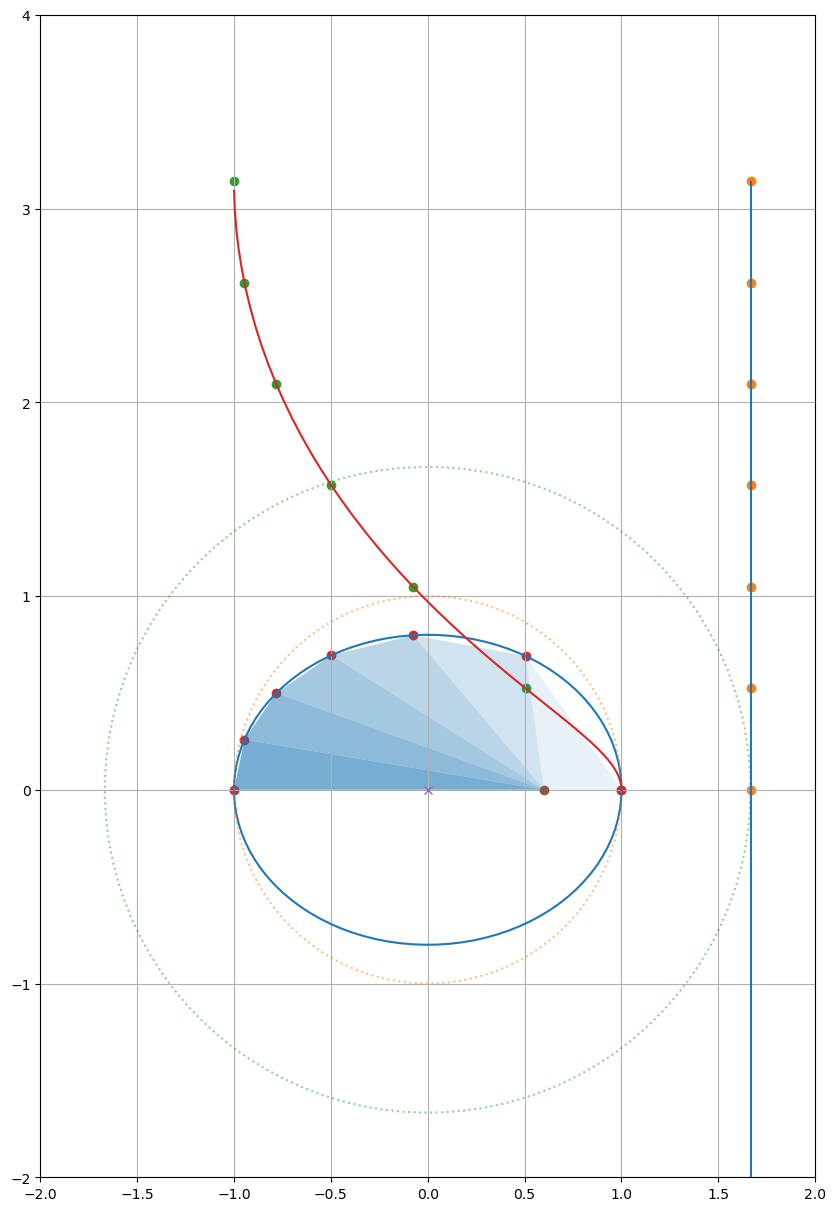

In [25]:
ax = plt.figure(figsize=(10,30)).add_subplot()
ax.set_xlim([-2,2])
ax.set_ylim([-2,4])
ax.set_aspect('equal')

X0 = np.cos(theta)
Y0 = b * np.sin(theta)
ax.plot(X0,Y0)

X1 = np.cos(theta)
Y1 = np.sin(theta)
ax.plot(X1,Y1, ':', alpha=.5)

X2 = (a/epsilon) * np.cos(theta)
Y2 = (a/epsilon) * np.sin(theta)
ax.plot(X2,Y2, ':', alpha=.5)

Y3 = a/epsilon*theta - a*np.sin(theta)
# Newton's cycloid
#ax.plot(np.cos(theta[:50]), Y3[:50])
ax.plot(np.cos(theta[:50]), epsilon*Y3[:50])

l = mc.LineCollection([[(a/epsilon,-2),(a/epsilon,np.pi)]])
ax.add_collection(l)

ax.plot(0,0,'x')
ax.plot(epsilon,0,'o')
ax.scatter(*zip(*[(a,0),(-a,0)]), alpha=.5)

phi = np.linspace(0, np.pi, 7)
X4=[t + np.sum([2/n * jv(n, epsilon*n) * np.sin(n*t) for n in range(1,40)]) for t in phi]
ax.scatter(np.full_like(phi, a/epsilon), phi)
ax.scatter(a*np.cos(X4), phi)

ax.scatter(a*np.cos(X4), b*np.sin(X4))

XY = np.array((a*np.cos(X4), b*np.sin(X4))).T
for i in range(XY.shape[0]-1):
    p=np.concatenate((np.array([[epsilon,0]]), XY[i:i+2]),axis=0)
    ax.add_patch(mp.Polygon(p, alpha=(i+1)/10))

plt.grid()
plt.show()

### 公転角速度の変化

[97.83899242 32.38159667 17.46700796 12.46664204 10.34259764  9.50316326]


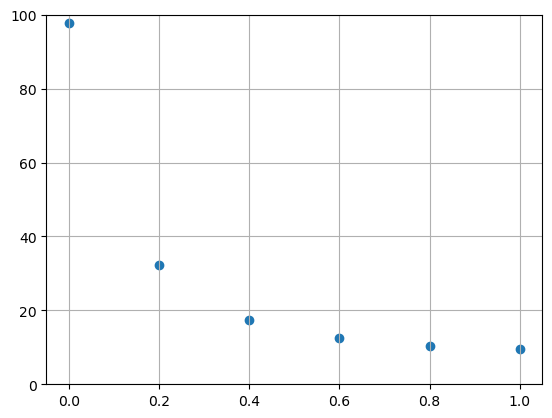

In [26]:
XY = np.array((a*np.cos(X4), b*np.sin(X4))).T
Y9=np.arctan2(*(XY-np.array((epsilon,0))).T[::-1])*180/np.pi
Y8=np.diff(Y9)
print(Y8)
plt.scatter(np.linspace(0,1,len(Y8)),Y8)
plt.ylim([0,100])
plt.grid()
plt.show()

### 火星の公転角速度の変化

[35.94653859 33.85827002 30.84781135 28.07926617 26.12558095 25.14253292]


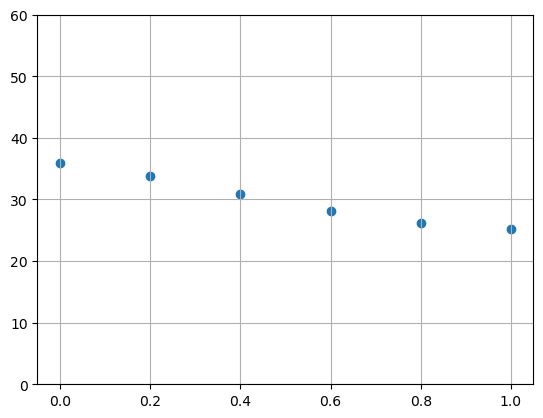

In [14]:
XY = np.array((a*np.cos(X4), b*np.sin(X4))).T
Y9=np.arctan2(*(XY-np.array((epsilon,0))).T[::-1])*180/np.pi
Y8=np.diff(Y9)
print(Y8)
plt.scatter(np.linspace(0,1,len(Y8)),Y8)
plt.ylim([0,60])
plt.grid()
plt.show()

### 地球の公転角速度の変化

[30.97439563 30.70013329 30.23879445 29.72662134 29.29985015 29.06020514]


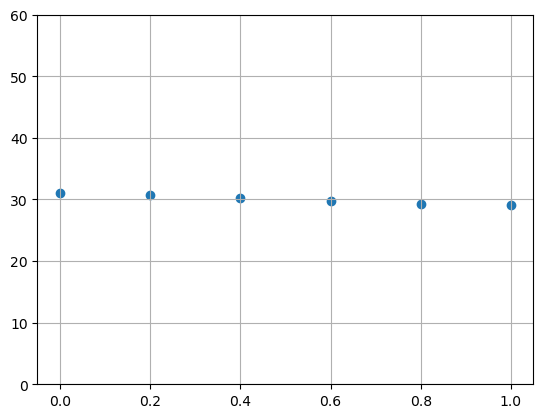

In [19]:
XY = np.array((a*np.cos(X4), b*np.sin(X4))).T
Y9=np.arctan2(*(XY-np.array((epsilon,0))).T[::-1])*180/np.pi
Y8=np.diff(Y9)
print(Y8)
plt.scatter(np.linspace(0,1,len(Y8)),Y8)
plt.ylim([0,60])
plt.grid()
plt.show()

## 参考) ケプラー方程式を解析的に解く

* [numpy - Find root of a transcendental equation with python - Stack Overflow](https://stackoverflow.com/questions/43047463/find-root-of-a-transcendental-equation-with-python)

In [38]:
from scipy.special import *

In [7]:
import numpy as np
from sympy import *

In [2]:
import matplotlib.pyplot as plt

In [61]:
t=np.pi/3
t + sum([2/n * jv(n, .6*n) * np.sin(n*t) for n in range(1,80)])

1.6455231032667712

In [62]:
X=np.linspace(0, 2*np.pi, 100)
Y=[t + sum([2/n * jv(n, .9*n) * np.sin(n*t) for n in range(1,40)]) for t in X]

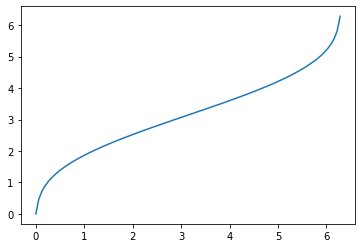

In [63]:
plt.plot(X,Y)

### 代数的には解けない

In [6]:
from scipy.optimize import fsolve

In [7]:
fsolve(lambda x: x - .9 * sin[x] - np.pi/3, [-2*np.pi, 2*np.pi])

NameError: name 'sin' is not defined